In [11]:
import numpy as np
import pandas as pd

In [12]:
df = pd.read_csv("supply_chain.csv")
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [13]:
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default= "plotly_white"

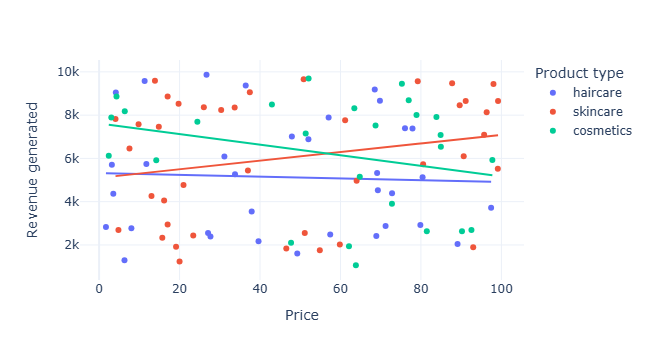

In [14]:
fix=px.scatter(df,x="Price",
               y="Revenue generated",
               color="Product type",
               hover_data=["Number of products sold"],
               trendline="ols")
fix.show()

In [15]:
sales_data= df.groupby("Product type")["Number of products sold"].sum().reset_index()
sales_data

,Product type,Number of products sold
0,cosmetics,11757
1,haircare,13611
2,skincare,20731


In [16]:
pie_chart=px.pie(sales_data,values="Number of products sold",
                 names="Product type",
                 title="Sales by product type",
                 hover_data=["Number of products sold"],
                 hole=0.5,
                 color_discrete_sequence=px.colors.qualitative.Pastel)
pie_chart.show()


In [17]:
total_revenue= df.groupby("Shipping carriers")["Revenue generated"].sum().reset_index()
fig=go.Figure()
fig.add_trace(go.Bar(x=total_revenue["Shipping carriers"],
                    y=total_revenue["Revenue generated"]))
fig.update_layout(title="Total Revenue by Shipping Carrier",
                 xaxis_title="Shipping Carrier",
                 yaxis_title="Revenue generated")
fig.show()

In [18]:
avg_lead_time=df.groupby("Product type")["Lead time"].mean().reset_index()
# avg_lead_time
avg_manufacturing_costs = df.groupby("Product type")["Manufacturing costs"].mean().reset_index()
result=pd.merge(avg_lead_time,avg_manufacturing_costs,
               on="Product type")
result.rename(columns={"Lead time": "Average Lead Time",
                      "Manufacturing costs": "Average Manufacturing costs"},
             inplace=True)
print(result)

  Product type  Average Lead Time  Average Manufacturing costs
0    cosmetics          13.538462                    43.052740
1     haircare          18.705882                    48.457993
2     skincare          18.000000                    48.993157


In [19]:
# Analyzing SKUs
# There's a column in the dataset as SKUs. You must have heard it for the very first time. 
#So, SKU stands for Stock Keeping Units. They're like special codes that help companies keep track of all the different things they have for sale.
#Imagine you have a large toy store with lots of toys. Each toy is different and has its name and price, but when you want to know how many you have left, you need a way to identify them. 
#So you give each toy a unique code, like a secret number only the store knows. This secret number is called SKU.

# I hope you have now understood what's SKU. Now let's analyze the revenue generated by each SKU:



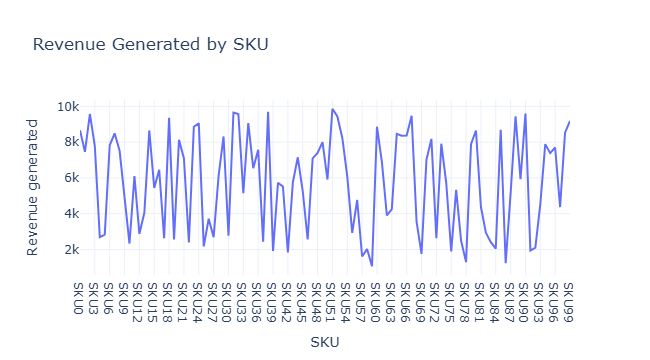

In [21]:
revenue_chart = px.line(df,x="SKU",
                       y="Revenue generated",
                       title="Revenue Generated by SKU")
revenue_chart.show()

In [23]:
# There's another column in the dataset as Stock levels.
# Stock levels refer to the number of products a store or business has in its inventory.
# Now let's have a look at the stock levels of each SKU:


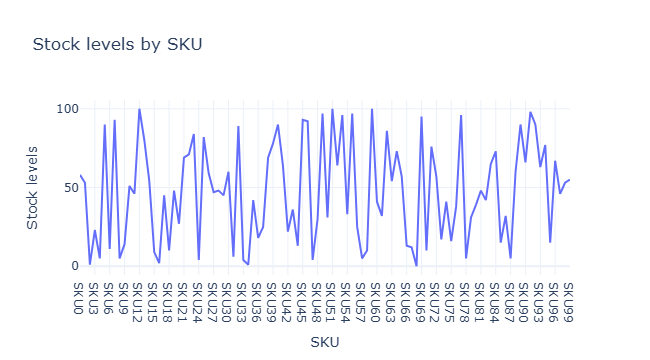

In [24]:
stock_chart=px.line(df,x="SKU",
                    y="Stock levels",
                    title="Stock levels by SKU")
stock_chart.show()

In [25]:
#Now let have a look at the order quantity of each SKU:


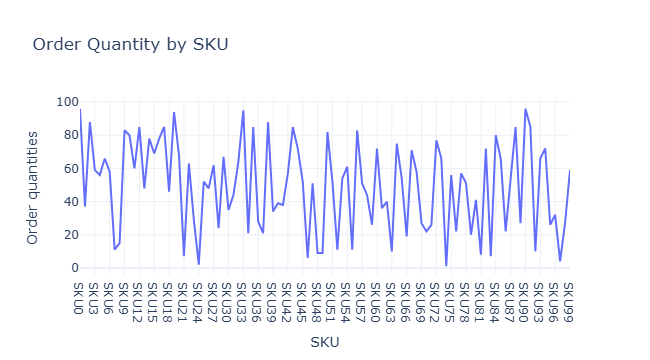

In [26]:
order_quantity_chart=px.line(df,x="SKU",
                             y="Order quantities",
                             title="Order Quantity by SKU")
order_quantity_chart.show()

In [27]:
#Cost Analysis

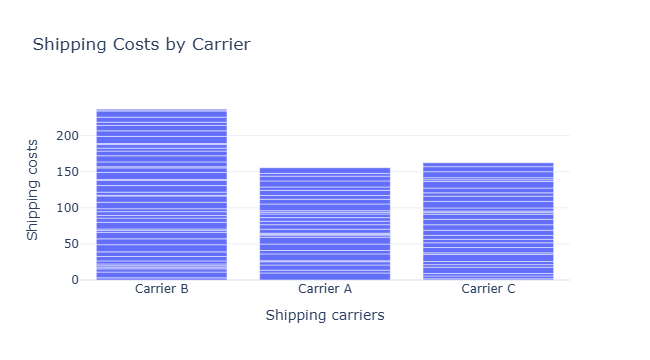

In [33]:
shipping_cost_chart=px.bar(df,x="Shipping carriers",
                           y="Shipping costs",
                           title="Shipping Costs by Carrier")
shipping_cost_chart.show()

In [34]:
# Now Lets's have a look at the cost distribution by transportation mode:


In [35]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [36]:
df.groupby("Transportation modes")["Costs"].mean().reset_index()


,Transportation modes,Costs
0,Air,561.712596
1,Rail,541.747556
2,Road,553.385988
3,Sea,417.819148


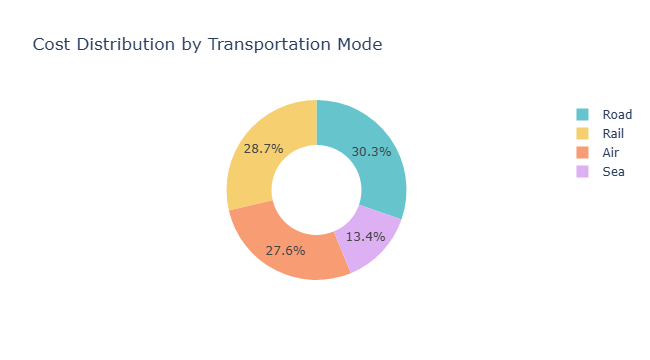

In [37]:
transportation_chart=px.pie(df,
                            values="Costs",
                            names="Transportation modes",
                            title="Cost Distribution by Transportation Mode",
                            hole=0.5,
                            color_discrete_sequence=
                            px.colors.qualitative.Pastel)
transportation_chart.show()

In [42]:
# So the company spends more on Road and Rail modes of
# transportation for the transportation of Goods.
# Analyzing Defect Rate The defect rate in the supply chain refers to the percentage of products that have something wrong or
# are found broken after shipping. Let's have a look at the average defect rate of all product types:
df. groupby('Product type' ) [ 'Defect rates' ].mean() .reset_index()

,Product type,Defect rates
0,cosmetics,1.919287
1,haircare,2.483150
2,skincare,2.334681


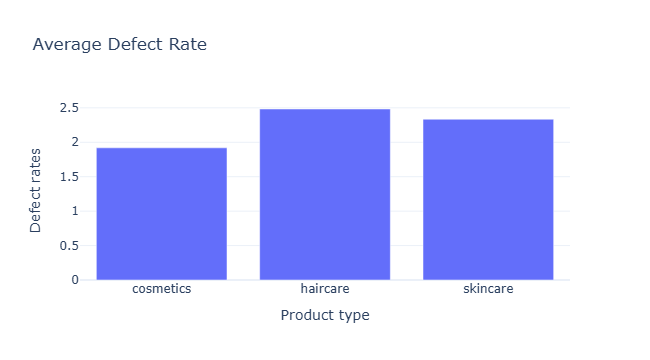

In [40]:
fig = px. bar(df_new ,
                x = 'Product type',
                y = 'Defect rates',
                title = 'Average Defect Rate' )
fig. show()


In [46]:
df_3=df.groupby("Transportation modes")["Defect rates"].sum().reset_index()
df_3

,Transportation modes,Defect rates
0,Air,47.422012
1,Rail,64.926789
2,Road,76.007216
3,Sea,39.359782


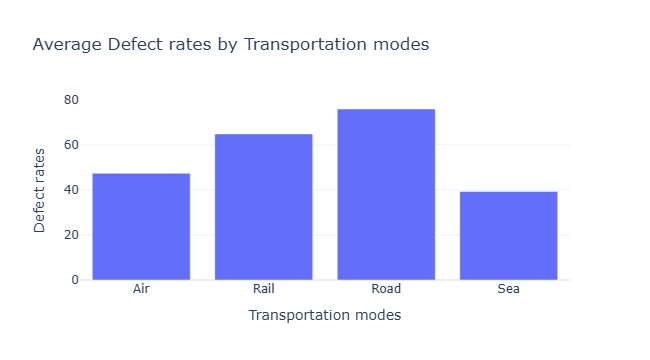

In [47]:
fig=px.bar(df_3,
           x="Transportation modes",
           y="Defect rates",
           title="Average Defect rates by Transportation modes")
fig.show()

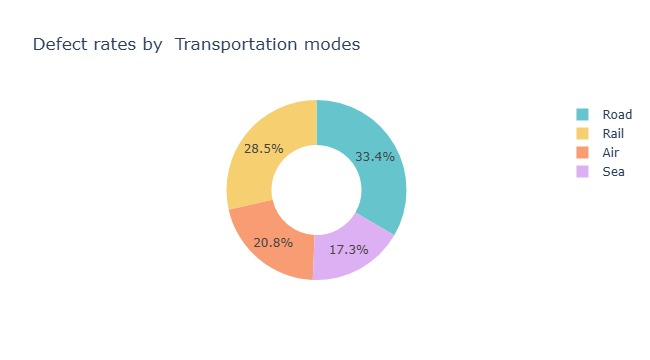

In [50]:
transportation_chart=px.pie(values=df_3["Defect rates"],
                           names=df_3["Transportation modes"],
                           title="Defect rates by  Transportation modes",
                           hole=0.5,
                           color_discrete_sequence=
                           px. colors.qualitative.Pastel)
transportation_chart. show()


In [51]:
# LOCATION WISE REVENUE GENERATED

In [53]:
df_4=df.groupby("Location")["Revenue generated"].sum().reset_index()
df_4

,Location,Revenue generated
0,Bangalore,102601.723880
1,Chennai,119142.815750
2,Delhi,81027.701225
3,Kolkata,137077.551005
4,Mumbai,137755.026880


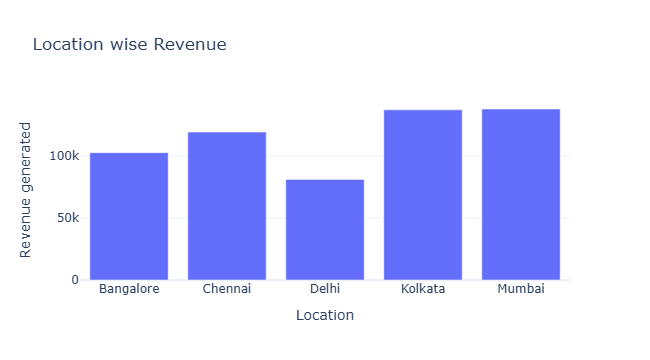

In [54]:
fig=px.bar(df_4,
          x=df_4["Location"],
          y=df_4["Revenue generated"],
          title="Location wise Revenue")
fig.show()